# COGS 108 - How well has the United States Replaced Energy Consumption with Renewable Energy from 2000 to 2020 Compared to Other Top GDP Countries

[Final Presentation Video](https://youtu.be/e01wKkzIGwo)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

In this project, we explored the relationship between renewable energy generation/consumption and if patent technology related to renewables and money had an impact. We specfically focused on the United States in comparison to other top GDP countries. The data were collected from multiple databases including [IRENA](https://www.irena.org/) and [OurworldInData](https://ourworldindata.org/). To explore the potential relatonships/correlations between each of our factors we will use a linear regression model and other statistics to explore the factors through a scatter matrix. The results overall found that the correlation between renewable engery consumption and renewable energy generated was the strongest, as well as other relationships between the other variables. However, due to our limitations, we would need to conduct more research in order to fully establish stronger correlations. 

# Names

- Keri Chen
- Michael Zhang
- TianLin Zhao
- Christine Deng
- Qiyu Chen

<a id='research_question'></a>
# Research Question

How well has the U.S replaced primary energy consumption with renewable sources of energy (like wind, solar, hydro) compared to other top GDP countries (China, Japan, Germany, France, United Kingdom, Canada, Australia, etc.) from 2000 to 2020?

If U.S did not do well, is it potentially because the U.S lacked attention to a specific area of renewable energy? Is it because the U.S did not invest enough in renewable technology? Is it because US lacked patents compared to other countries?

<a id='background'></a>

## Background & Prior Work

Now that climate change has become a common problem faced by all countries in the world. The lack of resources makes the new renewable energy become very important. Because of the growing issue of global warming and continued use of fossil fuels by major economies, many countries have planned to go carbon neutral by 2050. The United States has made many technological innovations in the development of renewable energy and made some scientific research achievements, which has helped to make renewables the second-most prevalent U.S electricty source in 2020[2]. However, the United States is a big energy user, so only a small amount of renewable energy can not fundamentally solve the energy problem since the U.S would need to generate mass amounts of it in order to replace energy sources like fossil fuels or natural gas[1]. 
Prior to starting this project, We all have a certain understanding of new renewable energy such as wind energy and solar energy, and we know that using renewable energy requires technology and capital investment. The United States is a powerful country in science and technology. Even in daily life, we can find various examples of using renewable energy, such as solar heaters. Many projects have summarized the use of renewable energy in the United States in various aspects. However, we believe that the use of renewable energy should be compared with other major economies to obtain the real development of renewable energy in the United States. Therefore, we collect and compare the energy use databases of the United States and several other major countries in recent years. We compare the percentage of renewable energy use and its change over time to analyze the development of renewable energy in the United States. At the same time, we hope to help relevant institutions find ways to improve the utilization of renewable energy through our conclusions.

Reference: 

[1] Desilver, D. (1 Jan 2020) Renewable energy is growing fast in the U.S., but fossil fuels still dominate. Pew Research Center. https://www.pewresearch.org/fact-tank/2020/01/15/renewable-energy-is-growing-fast-in-the-u-s-but-fossil-fuels-still-dominate/

[2] (28 Jul 2021) Renewables became the second-most prevalent U.S. electricity source in 2020. U.S. Energy Information Administration.
https://www.eia.gov/todayinenergy/detail.php?id=48896 

# Hypothesis


The United States has taken a great lead in the application of renewable sources compared with other countries, but there is still much room for progress in many aspects. Since the US has much larger energy requirements than other countries, it currently isn’t possible to provide all of it with renewable sources.
Therefore, we hypothesize that the United States in terms of renewable consumption compared to other countries will not be very good, but in terms of renewable energy generated may do better due its technology. Additionally, we hypothesize that patents and money donated and received will also correlate with a higher renewable energy consumption since it will allocate more resources towards that area of development.

# Dataset(s)

**dataset 1**
- Dataset Name: Modern renewable energy generation by source
- Link to the dataset: https://ourworldindata.org/grapher/modern-renewable-prod
- Number of observations: 5003
- This dataset has all of the renewable energy generated by each country split by wind, hydro, solar, and others from 1965-2021. This data is split by countries but also has data for combined regions.
- Note: There are some concerns about data collection, as we could not find how they collected the data.

**dataset 2**
- Dataset Name: Public Investment Trend in Renewable
- Link to the dataset: https://www.irena.org/Statistics/View-Data-by-Topic/Finance-and-Investment/Renewable-Energy-Finance-Flows
- Number of observations: 15927
- This dataset has the investment project and its amount in US dollar from the public sector of most countries from 2000 to 2020
- Note: no document on how the projects on collected.

**dataset 3**
- Dataset name: Renewable Energy Patents Evolution from IRENA.
- Link to the dataset: https://www.irena.org/Statistics/View-Data-by-Topic/Innovation-and-Technology/Patents-Evolution
- Number of observations: 31077
- The dataset includes information about the number of renewable energy patents published in different sectors by each country from the year 2000 to 2021. However, the data from recent years are not fully accurate and may be missing patents because of the time needed between filing the patent and the patent’s publication.
- Note: the source website claims that the data for recent years may be inaccurate. So we only use data until the year 2020.

**dataset 4**
- Dataset name: Share of Primary Energy From Renewable Sources
- Link to the dataset: https://ourworldindata.org/renewable-energy 
- Number of observations: 4835
- The dataset includes the percentage of energy that is from renewable sources of each year from a range of 1965 - 2020, depending on the country. 

**Plan to combine:**
We will combine the data for the years through 2000-2020 since some of our datasets only include data from onwards 2000, and do not include data past 2020. We will take the major countries (defined by the top 15 economies (minus Russia & South Korea due to lack of information in money spent dataset) in the world as defined by the country's GDP (Source: https://www.investopedia.com/insights/worlds-top-economies) plus the United States, and comparing all the major categories (money spent, patents, amount of energy generated) to answer our final question.

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = [11, 5]

# Data Cleaning

We will clean our datasets by changing the column names to something more readable, only use the columns that have relevent information to our research question, fix the years so they line up across all the datasets (2000 - 2020), and only use the countries defined in the major country category which is defined by major economies. Many of our datasets are already formatted correctly and do not contain words, so we do not need to do much filtering and cleaning in that aspect.

In [2]:
# Our comparison target: 
# TOP 13 GDP country: https://www.investopedia.com/insights/worlds-top-economies/ 
# Do not include Russia and South Korea due to lack of information in money spent dataset

major_country = ["United States", "China", "Japan", "Germany", "United Kingdom", "India", 
                 "France", "Italy", "Canada", "Brazil", "Australia", "Spain", "Mexico"]

In [3]:
# Load datasets
windsolarhydrodataset = pd.read_csv(r'data/modern-renewable-energy-consumption.csv')
national_re_invest = pd.read_excel("data/IRENA_RE_Public_Investment_July2021.xlsx")
patent_df = pd.read_csv('data/IRENA-INSPIRE-renewable-energy-patents-evolution.csv')
percent_renewables = pd.read_csv('data/renewable-share-energy (2).csv')

In [4]:
# Data cleaning for dataset 1:
windsolarhydrodataset.columns = ['Country', 'Code', 'Year', 'Wind', 'Solar', 'Other', 'Hydro']

# filter data by countries
# windsolarhydrodataset = windsolarhydrodataset[(windsolarhydrodataset.Country == 'United States') | (windsolarhydrodataset.Country == 'France') | (windsolarhydrodataset.Country == 'Germany') | 
# (windsolarhydrodataset.Country == 'United Kingdom') | (windsolarhydrodataset.Country == 'Japan') | (windsolarhydrodataset.Country == 'China') | (windsolarhydrodataset.Country == 'Canada') 
# | (windsolarhydrodataset.Country == 'India') | (windsolarhydrodataset.Country == 'Italy') | (windsolarhydrodataset.Country == 'South Korea') | (windsolarhydrodataset.Country == 'Russia')
# | (windsolarhydrodataset.Country == 'Brazil') | (windsolarhydrodataset.Country == 'Spain') | (windsolarhydrodataset.Country == 'Mexico') | (windsolarhydrodataset.Country == 'Australia')]
windsolarhydrodataset = windsolarhydrodataset[(windsolarhydrodataset.Country == 'United States') | (windsolarhydrodataset.Country == 'France') | (windsolarhydrodataset.Country == 'Germany') | 
(windsolarhydrodataset.Country == 'United Kingdom') | (windsolarhydrodataset.Country == 'Japan') | (windsolarhydrodataset.Country == 'China') | (windsolarhydrodataset.Country == 'Canada') 
| (windsolarhydrodataset.Country == 'India') | (windsolarhydrodataset.Country == 'Italy')
| (windsolarhydrodataset.Country == 'Brazil') | (windsolarhydrodataset.Country == 'Spain') | (windsolarhydrodataset.Country == 'Mexico') | (windsolarhydrodataset.Country == 'Australia')]

# filter data by years
windsolarhydrodataset = windsolarhydrodataset[windsolarhydrodataset.Year >= 2000]

# create an overall renewable energy generation column
windsolarhydrodataset['Overall'] = windsolarhydrodataset['Wind'] + windsolarhydrodataset['Solar'] + windsolarhydrodataset['Hydro'] + windsolarhydrodataset['Other']
windsolarhydrodataset = windsolarhydrodataset.drop(columns='Code')

print(windsolarhydrodataset.shape)
windsolarhydrodataset.head()

(273, 7)


,Country,Year,Wind,Solar,Other,Hydro,Overall
259,Australia,2000,0.13400,0.04675,0.88950,16.46650,17.53675
260,Australia,2001,0.28700,0.05415,0.79750,16.12350,17.26215
261,Australia,2002,0.53355,0.05830,1.26680,16.09500,17.95365
262,Australia,2003,0.70405,0.06320,1.69180,16.21055,18.66960
263,Australia,2004,0.79500,0.07295,2.81525,15.68665,19.36985


In [5]:
# for dataset2
national_re_invest.columns = ["ISO", "Country", "Region", "Project", 'Donor', 'Agency',
                               'Year', 'Category', 'Technology', 'Sub-technology', 'Finance_Group',
                               'Finance_Type', 'Source', 'Reference_date', 'Amount' ]

# remove non-renewable project
national_re_invest = national_re_invest[national_re_invest["Category"] == "Renewables"]
# relevant_columns = ["Country", "Region", "Project", 'Donor', "Year",  "Technology",'Source','Amount']
relevant_columns = ["Country", "Region", 'Donor', "Year",  "Technology",'Amount']
national_re_invest = national_re_invest[relevant_columns]

# rename country name to agree with the major_country
national_re_invest = national_re_invest.replace(["USA", "UK"], ["United States", "United Kingdom"])
national_re_invest = national_re_invest[national_re_invest["Year"] <= 2020 ]

print(national_re_invest.shape)
national_re_invest.head()

(12631, 6)


,Country,Region,Donor,Year,Technology,Amount
0,Algeria,Africa,Japan,2019,Multiple renewables,0.016066
1,Algeria,Africa,France,2019,Solar energy,0.015672
2,Algeria,Africa,France,2019,Solar energy,0.015672
3,Algeria,Africa,France,2019,Solar energy,0.001791
4,Algeria,Africa,Japan,2013,Multiple renewables,0.928327


In [6]:
# for dataset 3: Renewable Energy Patents Evolution from IRENA.
# Select only relevant columns from dataset
patent_df = patent_df[['Year', 'Country/area', 'Number of Patents']]

# Rename columns to shorter column names
patent_df.columns = ['Year', 'Country', 'Number of Patents']

# Select only observations containing US & other major countries
patent_df = patent_df[(patent_df['Country'] == 'United States of America') | (patent_df['Country'] == 'China') | (patent_df['Country'] == 'Japan') | 
(patent_df['Country']  == 'Germany') | (patent_df['Country']  == 'United Kingdom') | (patent_df['Country']  == 'India') | (patent_df['Country']  == 'France') | (patent_df['Country']  == 'Italy')\
| (patent_df['Country']  == 'Canada') | (patent_df['Country']  == 'Brazil') | (patent_df['Country']  == 'Australia') | (patent_df['Country']  == 'Spain') | (patent_df['Country']  == 'Mexico')]

# Select only years from 2000-2020
patent_df = patent_df[(patent_df["Year"] >= 2000) & (patent_df["Year"] <= 2020)]

# Make sure names of countries have consistent representations in all datasets
patent_df['Country'] = patent_df['Country'].replace('United States of America', 'United States')

# Get sum of all patents for each country for each year across
patent_df = patent_df.groupby(['Country', 'Year']).sum()
patent_df.head()

Number of Patents
Country   Year                   
Australia 2000               1778
          2001               2378
          2002               1603
          2003               3347
          2004                877

In [7]:
# for dataset 4: Percentage of Primary Energy Consumption¶
#Change columns to something easier to read
percent_renewables.columns = ['Country', 'Code', 'Year', 'Percentage']

#Drop code column because it is not neccessary 
percent_renewables = percent_renewables.drop('Code',axis=1)

#filter out to only have 2000 - 2020 & from relevent countries defined in major country
percent_renewables = percent_renewables[(percent_renewables['Year']>=2000) & (percent_renewables['Year']<=2020)]
percent_renewables = percent_renewables[percent_renewables['Country'].isin(major_country)]

percent_renewables = percent_renewables.reset_index()

#remove old index column
percent_renewables = percent_renewables.drop('index',axis=1)

percent_renewables

,Country,Year,Percentage
0,Australia,2000,3.788
1,Australia,2001,3.686
2,Australia,2002,3.734
3,Australia,2003,3.798
4,Australia,2004,3.782
...,...,...,...
268,United States,2016,7.754
269,United States,2017,8.504
270,United States,2018,8.396
271,United States,2019,8.699


# Data Analysis & Results

We will first do some exploratory data analysis on each dataset to see what the data looks like, and how the United States ranks relative to the other countries in each respective dataset. From there, we can then combine the datasets together to look for correlations, if any, and if factors like the amount of money donated and patents for renewable energy accounts for the differences in renewable energy usage and generation.  

## Descriptive statistics and EDA

Before we merge our datasets together, we will generate some descriptive statistics as well as visualizations to better understand the data and the overall trends in our datasets.

### Dataset 1: Modern renewable energy generation by source

In [8]:
print(windsolarhydrodataset[(windsolarhydrodataset.Country == 'United States')].describe())

# Descriptive stats for the amt. of renewable energy generated by wind, hydro, solar, and others in 2000-2021 in the U.S.

              Year        Wind       Solar      Other       Hydro     Overall
count    21.000000   21.000000   21.000000  21.000000   21.000000   21.000000
mean   2010.000000  122.142090   27.646781  75.816599  268.175223  493.780692
std       6.204837  109.948762   41.474914   5.210445   22.187177  163.763346
min    2000.000000    5.649759    0.518513  66.582822  210.240000  284.450172
25%    2005.000000   17.990454    0.748901  72.598060  257.274684  353.214233
50%    2010.000000   95.608329    3.013036  75.061846  266.549848  430.957896
75%    2015.000000  192.644998   39.426263  80.665532  285.467664  562.260654
max    2020.000000  340.919005  133.970707  84.070229  316.095341  840.391565


In [9]:
print(windsolarhydrodataset[(windsolarhydrodataset.Country != 'United States')].describe())

# Same as above, but for all major countries besides the U.S.
# By comparison, we can see U.S. has produced much more than the average non-US countries

              Year        Wind       Solar       Other        Hydro  \
count   252.000000  252.000000  252.000000  252.000000   252.000000   
mean   2010.000000   26.813601   10.432347   16.768287   155.629614   
std       6.067351   55.775925   28.092548   18.036082   239.077798   
min    2000.000000    0.001000    0.000000    0.797500     3.227700   
25%    2005.000000    2.050265    0.026250    5.391043    22.387058   
50%    2010.000000    9.645000    0.697810    9.799886    51.298500   
75%    2015.000000   31.078242    8.963824   23.289446   178.332580   
max    2020.000000  466.500000  261.100000  135.524200  1322.009109   

           Overall  
count   252.000000  
mean    209.643848  
std     309.801672  
min       9.547648  
25%      51.552482  
50%     101.878276  
75%     277.859528  
max    2185.133309  


<AxesSubplot:xlabel='Year', ylabel='Wind'>

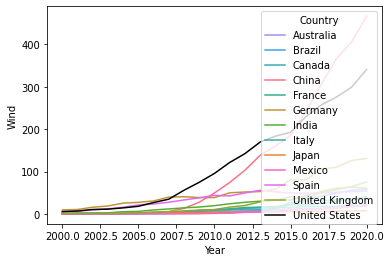

In [10]:
countries = np.array(major_country)
countries = np.append(countries[countries != "United States"], "United States") # set US to the last
palatte = [sns.color_palette("husl", n_colors=10, as_cmap=True)(i)[:3] 
           for i in np.arange(0., 1., 1/(len(countries) - 1) )] + [[0., 0., 0.]] # set the last color to black
cmap = dict(zip(countries, palatte))

sns.lineplot(x='Year', y='Wind', hue='Country', data=windsolarhydrodataset, palette=cmap)

<AxesSubplot:xlabel='Year', ylabel='Solar'>

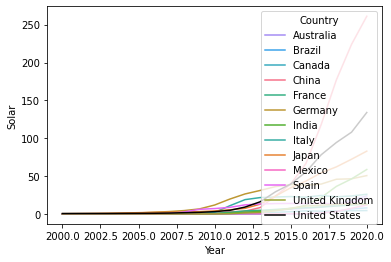

In [11]:
sns.lineplot(x='Year', y='Solar', hue='Country', data=windsolarhydrodataset, palette=cmap)

<AxesSubplot:xlabel='Year', ylabel='Hydro'>

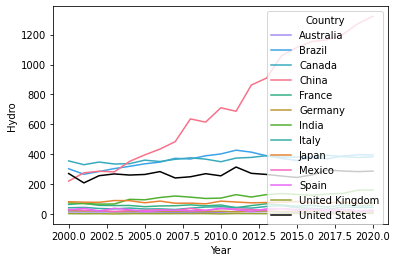

In [12]:
sns.lineplot(x='Year', y='Hydro', hue='Country', data=windsolarhydrodataset, palette=cmap)

<AxesSubplot:xlabel='Year', ylabel='Other'>

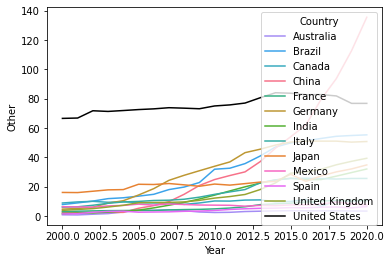

In [13]:
sns.lineplot(x='Year', y='Other', hue='Country', data=windsolarhydrodataset, palette=cmap)

<AxesSubplot:xlabel='Year', ylabel='Overall'>

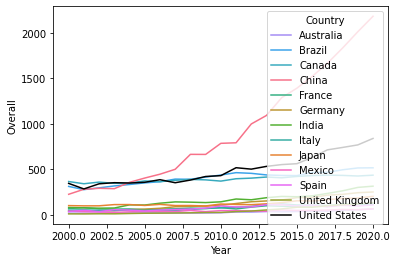

In [14]:
sns.lineplot(x='Year', y='Overall', hue='Country', data=windsolarhydrodataset, palette=cmap)

The US used to be the leader in most categories, but has since been overtaken by China, however is 2nd or 3rd in most of these categories. This means that the US has done a good job at producing renewable energy resources and also developing new ones. Comparing to other countries, only China has clearly outstrippen them in terms of raw energy production.

In [15]:
## long format for data merging
renew_amount_by_year = windsolarhydrodataset
renew_amount_by_year

,Country,Year,Wind,Solar,Other,Hydro,Overall
259,Australia,2000,0.134000,0.046750,0.889500,16.466500,17.536750
260,Australia,2001,0.287000,0.054150,0.797500,16.123500,17.262150
261,Australia,2002,0.533550,0.058300,1.266800,16.095000,17.953650
262,Australia,2003,0.704050,0.063200,1.691800,16.210550,18.669600
263,Australia,2004,0.795000,0.072950,2.815250,15.686650,19.369850
...,...,...,...,...,...,...,...
4738,United States,2016,229.285416,55.420202,82.722566,263.763663,631.191847
4739,United States,2017,256.871409,78.057576,82.800321,296.806446,714.535752
4740,United States,2018,275.421671,94.308081,81.893206,289.514596,741.137554
4741,United States,2019,298.871196,107.973737,76.820543,285.467664,769.133140


### Dataset 2: Received/donated public investment on renewable energy for each country by years

Text(0.5, 0.98, 'total amount of public investment in renewable resources by all countries')

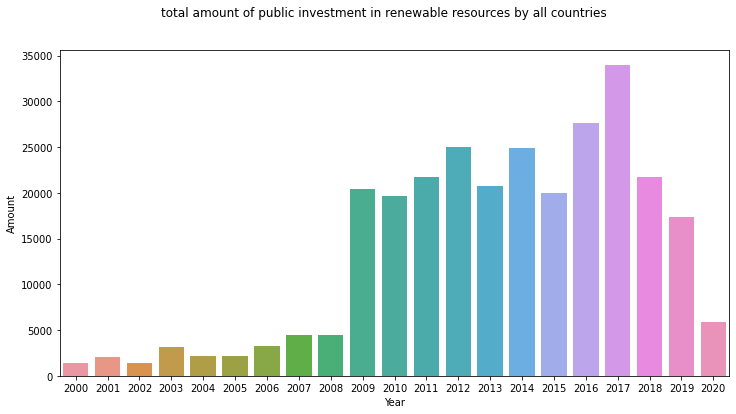

In [61]:
# plot total amount of public investment in renewable resources by all countries across all years
amount_by_year = national_re_invest.groupby(by="Year")["Amount"].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=amount_by_year.index, y=amount_by_year)
plt.suptitle("total amount of public investment in renewable resources by all countries")

The global trend of public investment is increasing, except for in the recent past 3 years.

Text(0.5, 0.98, 'total amount of public investment in renewable resources by the United States')

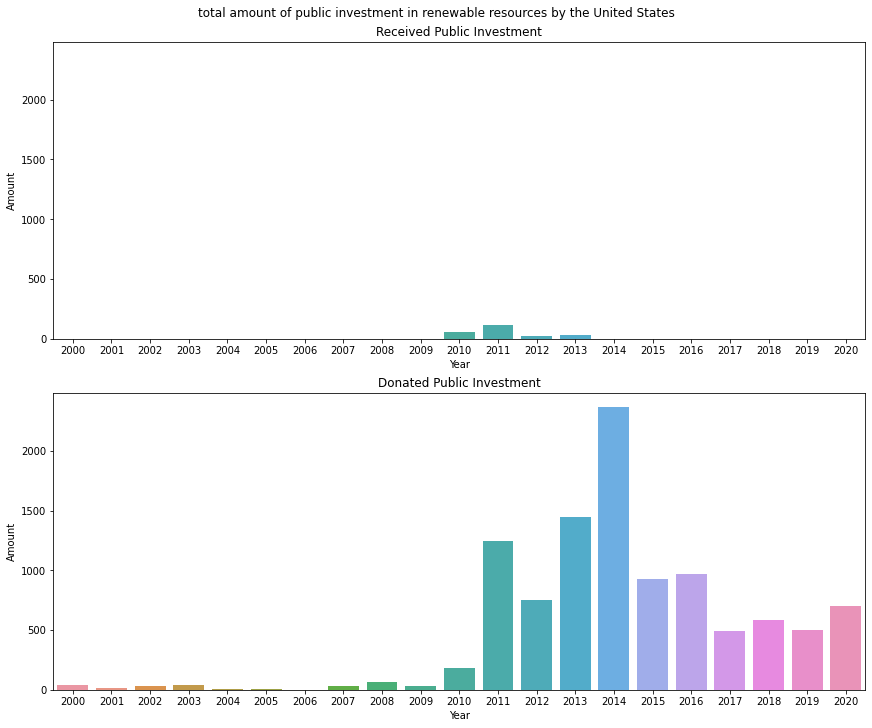

In [63]:
# plot US public investment received/donated by year
fig, axes = plt.subplots(2,1, figsize=(12,10), sharey=True, constrained_layout=True)
rec_amount_by_year = national_re_invest[national_re_invest["Country"] == "United States"].groupby(by="Year")["Amount"].sum()
donated_amount_by_year = national_re_invest[national_re_invest["Donor"] == "United States"].groupby(by="Year")["Amount"].sum()
# plt.figure(figsize=(12,6))

sns.barplot(x=donated_amount_by_year.index, y=donated_amount_by_year, ax=axes[1])
axes[1].set_title("Donated Public Investment")

# set Received Public Investment in other years to 0
for year in donated_amount_by_year.index:
    if year not in rec_amount_by_year.index:
        rec_amount_by_year[year] = 0
sns.barplot(x=rec_amount_by_year.index, y=rec_amount_by_year, ax=axes[0])
axes[0].set_title("Received Public Investment")

plt.suptitle("total amount of public investment in renewable resources by the United States")

In general, USA did not receive much public investment, and gradually increased the amount of donated public investment with a peak in 2014.

In [19]:
# make sure that each major country is in the dataset:
print("Missing major country as receiver")
# print(np.isin(major_country, national_re_invest["Country"].unique()))
print(np.array(major_country)[~np.isin(major_country, national_re_invest["Country"].unique())])
print("Missing major country as donor")
# print(np.isin(major_country, national_re_invest["Donor"].unique()))
print(np.array(major_country)[~np.isin(major_country, national_re_invest["Donor"].unique())])

Missing major country as receiver
['Japan' 'Australia']
Missing major country as donor
['India' 'Mexico']


The dataset actually has Korea and Other Asia, but I think removing these two countries from our initial 15 top GDP countries for further analysis should be fine.

In [64]:
# extract top GDP countries:
top_rec_amount_by_year = (national_re_invest
    [national_re_invest["Country"].isin(major_country)]
    .pivot_table(index="Year", columns="Country", values="Amount", aggfunc="sum", fill_value=0)
)
top_donate_amount_by_year = (national_re_invest
    [national_re_invest["Donor"].isin(major_country)]
    .pivot_table(index="Year", columns="Donor", values="Amount", aggfunc="sum", fill_value=0)
)

print("--Received amount")
display(top_rec_amount_by_year.head())
print("--Received amount stat")
display(top_rec_amount_by_year.describe())
print("--Donated amount stat")
display(top_donate_amount_by_year.describe())

--Received amount


Country,Brazil,Canada,China,France,Germany,India,Italy,Mexico,Spain,United Kingdom,United States
Year,,,,,,,,,,,
2000,126.496230,0.0,243.616072,0.0,0.0,485.725749,0.0,2.451417,0.0,0.0,0.0
2001,5.289642,0.0,325.047031,0.0,0.0,193.142005,0.0,3.426957,0.0,0.0,0.0
2002,45.306944,0.0,218.267955,0.0,0.0,17.159399,0.0,14.191079,0.0,0.0,0.0
2003,7.525666,0.0,22.510192,0.0,0.0,10.700966,0.0,0.261436,0.0,0.0,0.0
2004,1.140878,0.0,32.680953,0.0,0.0,399.429981,0.0,0.526644,0.0,0.0,0.0


--Received amount stat


Country,Brazil,Canada,China,France,Germany,India,Italy,Mexico,Spain,United Kingdom,United States
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2148.639859,20.299215,210.801982,307.175510,176.560094,686.664991,161.754023,149.624155,249.479029,489.496336,10.962656
std,3168.818494,93.022687,266.987481,394.784312,260.031900,637.423815,302.948553,182.014265,352.397310,704.160820,28.380884
min,0.097393,0.000000,13.635032,0.000000,0.000000,10.700966,0.000000,0.160251,0.000000,0.000000,0.000000
25%,7.525666,0.000000,58.541096,0.000000,0.000000,210.654481,0.000000,3.426957,0.000000,0.000000,0.000000
50%,1523.475870,0.000000,142.767101,147.446378,0.000000,465.635141,0.000000,33.673656,46.855202,0.000000,0.000000
75%,2767.622207,0.000000,243.616072,558.907137,294.068694,865.647134,196.191142,366.045760,340.501432,1116.540754,0.000000
max,11601.607915,426.283507,1271.872208,1387.852929,732.458457,2198.171641,1275.693976,502.059898,1070.217939,2109.860010,117.638503


--Donated amount stat


Donor,Australia,Brazil,Canada,China,France,Germany,Italy,Japan,Spain,United Kingdom,United States
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.929280,1991.864675,35.870777,2572.510173,363.439984,737.319826,29.514439,605.325220,50.715124,272.359202,496.718831
std,2.973036,3110.009588,63.737740,2744.619823,392.623237,636.876616,68.204499,515.961916,84.585070,473.913561,623.752413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.827103,0.000000,0.000000,2.202509
25%,0.000000,0.000000,0.854583,774.383223,17.046524,226.722756,0.847538,207.042968,1.488122,2.959563,30.101964
50%,0.261931,1146.992928,2.416259,1785.568698,246.948325,725.823401,3.470019,507.112024,7.854633,17.777942,180.367891
75%,3.209811,2657.795656,49.684870,3903.620223,723.822417,1010.204410,24.878803,714.450189,50.306565,212.102967,749.779627
max,10.952037,11373.124605,228.207552,11691.836181,1189.955578,2142.434534,297.191331,2008.861444,285.799804,1513.565921,2365.562199


Text(0.5, 0, 'Receiver')

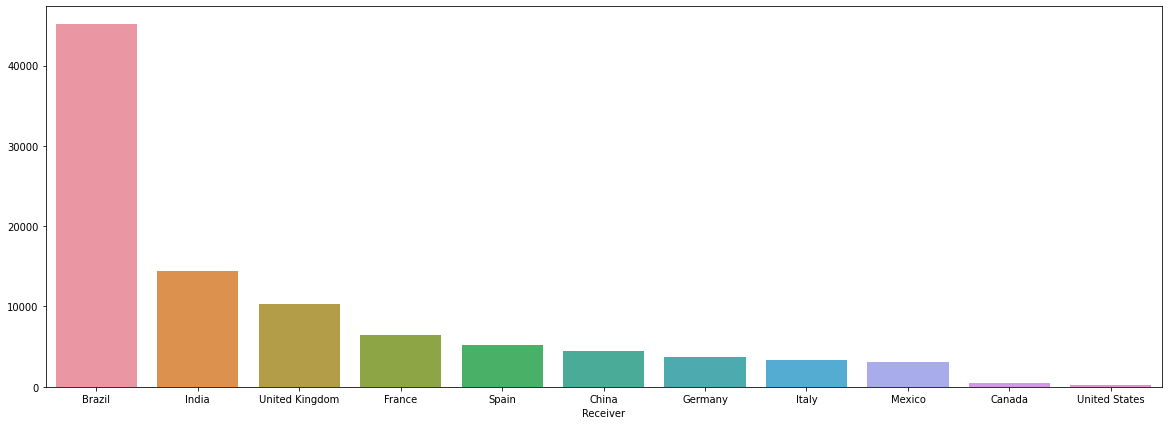

In [65]:
# plot by top recipient countries since 2000
amount_by_country = top_rec_amount_by_year.sum().sort_values(ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(x=amount_by_country.index, y=amount_by_country)
plt.xlabel("Receiver")

<AxesSubplot:xlabel='Donor'>

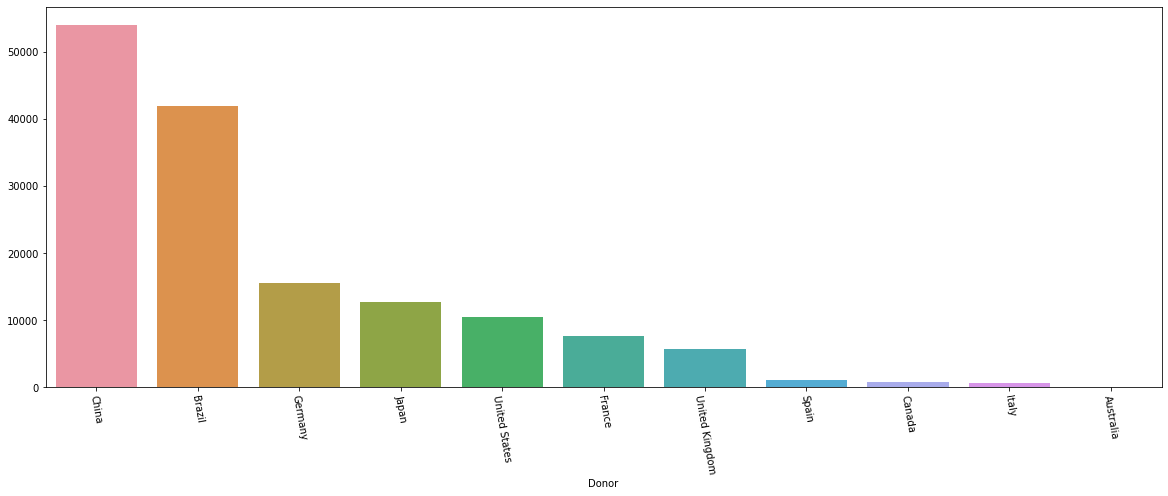

In [22]:
# plot by top donor countries/org since 2000
amount_by_country = top_donate_amount_by_year.sum().sort_values(ascending=False)
plt.figure(figsize=(20,7))
# plt.tick_params(axis='x', rotation=-80)
plt.xticks(rotation=-80)
sns.barplot(x=amount_by_country.index, y=amount_by_country)

From the perspective view of total received public investment on renewable energy, USA did not get much. On the other hand, USA is the top 5 in total donated public investment.

In [23]:
# recieved amount for top GDP countries from 2000 to 2020
# unpivot the dataframe to draw a line plot
top_rec_amount_by_year_long = top_rec_amount_by_year.reset_index().melt(id_vars=["Year"], var_name='Country', value_name='Amount')
top_donate_amount_by_year_long = top_donate_amount_by_year.reset_index().melt(id_vars=["Year"], var_name='Donor', value_name='Amount')

display(top_rec_amount_by_year_long)
# display(top_donate_amount_by_year_long)

,Year,Country,Amount
0,2000,Brazil,126.496230
1,2001,Brazil,5.289642
2,2002,Brazil,45.306944
3,2003,Brazil,7.525666
4,2004,Brazil,1.140878
...,...,...,...
226,2016,United States,0.000000
227,2017,United States,0.000000
228,2018,United States,0.000000
229,2019,United States,0.000000


In [24]:
## define the cmap so that USA is black
countries = np.array(major_country)
countries = np.append(countries[countries != "United States"], "United States") # set US to the last
palatte = [sns.color_palette("husl", n_colors=10, as_cmap=True)(i)[:3] 
           for i in np.arange(0., 1., 1/(len(countries) - 1) )] + [[0., 0., 0.]] # set the last color to black
cmap = dict(zip(countries, palatte))
cmap

{'China': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 'Japan': (0.9071975303984048, 0.5097428969577137, 0.1959184222473579),
 'Germany': (0.7393544810603669, 0.5935705608268428, 0.19447427707312873),
 'United Kingdom': (0.5920891529639701,
  0.6418467016378244,
  0.1935069134991043),
 'India': (0.32167817651263064, 0.6918681151085289, 0.19239408333012523),
 'France': (0.20285039084876416, 0.6885218992303662, 0.5123290742758754),
 'Italy': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 'Canada': (0.21772671491320644, 0.6658941457336356, 0.7464372465091529),
 'Brazil': (0.23214695302050165, 0.6411319006107515, 0.917004183045936),
 'Australia': (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 'Spain': (0.9037992883094922, 0.40568500206085367, 0.9577027133800863),
 'Mexico': (0.9631742439485064, 0.40514198458478756, 0.7656409302685112),
 'United States': [0.0, 0.0, 0.0]}

''

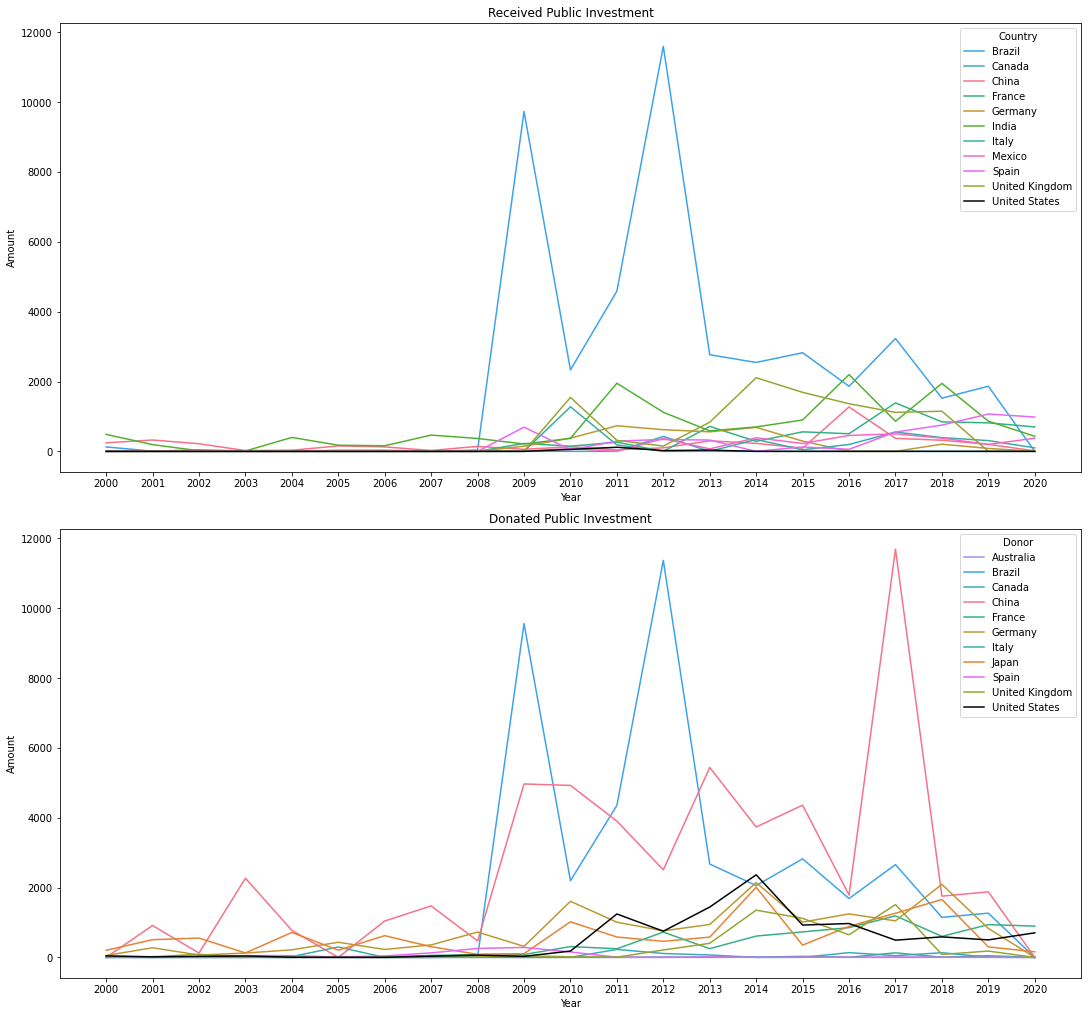

In [25]:
# plot public investment received/donated by year
fig, axes = plt.subplots(2,1, figsize=(15,14), sharey=True, constrained_layout=True)

sns.lineplot(data=top_rec_amount_by_year_long, x="Year", y="Amount", hue="Country", palette=cmap, ax=axes[0])
axes[0].set_title("Received Public Investment")
axes[0].set_xticks(top_rec_amount_by_year_long["Year"].unique())

sns.lineplot(data=top_donate_amount_by_year_long, x="Year", y="Amount", hue="Donor", palette=cmap, ax=axes[1])
axes[1].set_title("Donated Public Investment")
axes[1].set_xticks(top_donate_amount_by_year_long["Year"].unique())

;

From the above lineplot, we can see that over the last 20 years, USA consistently received low amount of public investment on renewable energy, and the same for the amount of donated public investment, except during 2011 to 2016 and after 2019.

In [26]:
## for data merging
rec_inv_by_year = top_rec_amount_by_year_long
rec_inv_by_year.columns = ["Year","Country","Received inv"]

donate_inv_by_year = top_donate_amount_by_year_long
donate_inv_by_year.columns = ["Year","Country","Donated inv"]

rec_donate_inv_by_year = rec_inv_by_year.merge(donate_inv_by_year, how="outer", on=("Year","Country"))
rec_donate_inv_by_year = rec_donate_inv_by_year.fillna(0)
rec_donate_inv_by_year

,Year,Country,Received inv,Donated inv
0,2000,Brazil,126.496230,0.000000
1,2001,Brazil,5.289642,0.000000
2,2002,Brazil,45.306944,11.957554
3,2003,Brazil,7.525666,0.000000
4,2004,Brazil,1.140878,0.000000
...,...,...,...,...
268,2016,Japan,0.000000,889.406827
269,2017,Japan,0.000000,1264.698319
270,2018,Japan,0.000000,1659.034071
271,2019,Japan,0.000000,300.267748


### Dataset 3: Renewable Energy Patents Evolution from IRENA.

In [27]:
# Check out descriptive stats for the Number of Patents published from 2000-2020 by all countries together
display(patent_df['Number of Patents'].describe().to_frame())

# Check out descriptive stats for the Number of Patents published from 2000-2020 by each country separately
display(patent_df.groupby('Country')['Number of Patents'].describe().sort_values('mean'))

,Number of Patents
count,267.000000
mean,8102.265918
std,18931.423733
min,1.000000
25%,624.500000
50%,1615.000000
75%,6349.000000
max,141244.000000


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
India,17.0,144.235294,327.491322,1.0,3.0,4.0,11.00,1259.0
Italy,20.0,299.500000,213.097828,10.0,111.5,249.5,417.25,720.0
Mexico,20.0,581.550000,318.080671,36.0,294.0,653.0,857.50,997.0
United Kingdom,21.0,982.761905,423.756641,313.0,523.0,1134.0,1344.00,1479.0
Spain,21.0,1159.095238,655.659584,146.0,660.0,1021.0,1840.00,2239.0
Brazil,21.0,1162.619048,663.208977,78.0,556.0,1302.0,1403.00,2349.0
France,21.0,1181.285714,636.884695,99.0,595.0,1334.0,1644.00,2165.0
Australia,21.0,1824.333333,628.821305,722.0,1603.0,1790.0,2128.00,3347.0
Canada,21.0,2341.904762,819.252031,364.0,1717.0,2548.0,3069.00,3449.0


Looking at the average number of patents filed by country, China has the most, followed by the United States.

This makes it seem like the United States is doing well in terms of producing patents for renewable energy, but we are not sure if this success in making patents is related to their percent change in using renewable energy. To see if these patents have any correlation to much energy a country uses with renewable sources, we will examine this in the analysis.

In [28]:
# Fix multi-index by resetting the index

num_patents_by_year = patent_df.reset_index()
num_patents_by_year

,Country,Year,Number of Patents
0,Australia,2000,1778
1,Australia,2001,2378
2,Australia,2002,1603
3,Australia,2003,3347
4,Australia,2004,877
...,...,...,...
262,United States,2016,29977
263,United States,2017,31003
264,United States,2018,30361
265,United States,2019,27348


<AxesSubplot:xlabel='Year', ylabel='Number of Patents'>

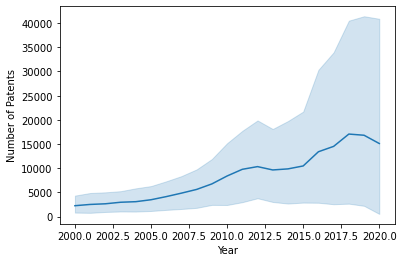

In [29]:
# In aggregate (across all countries), how have the number of patents changed over the years?

sns.lineplot(x=num_patents_by_year['Year'], y=num_patents_by_year['Number of Patents'])

Across all countries, the general trend is that the number of patents over time increases. There have been periods of slight decreases in certain years, but the general slope is positive.

This means that overtime, there have been more total patents created by all countries. We wonder if this increase also means that countries' percent change in energy consumption using renewable resources has also increased overtime, and wonder if there exists any correlation between the number of patents and the percent change in use in renewable energy. Again, this will be explored in the analysis.

<AxesSubplot:xlabel='Year', ylabel='Number of Patents'>

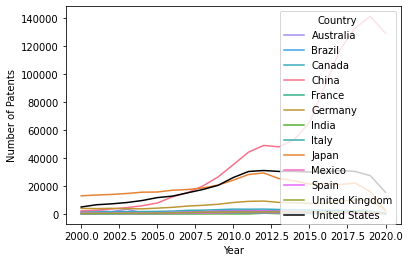

In [30]:
# How have the number of patents changed over the year -- broken down by country?
palatte = [sns.color_palette("husl", n_colors=10, as_cmap=True)(i)[:3] 
           for i in np.arange(0., 1., 1/(len(countries) - 1) )] + [[0., 0., 0.]] # set the last color to black
cmap = dict(zip(countries, palatte))
sns.lineplot(x=num_patents_by_year['Year'], y=num_patents_by_year['Number of Patents'], hue=num_patents_by_year['Country'], palette=cmap)

When we start to look at countries separated in terms of patents filed, it seems that China is responsible for the general increase shape after 2015. China has the most dramatic change in number of patents filed.

Looking at the United States, there seems to be a steady increase from 2000 to around 2011, but then the number of patents filed begins to remain constant before decreasing. However, we also see this trend in other major countries (besides China). It seems that the United States is not doing much better than other countries, as their number of patents filed is not improving very much over time.

For a greater exploration of this dataset, see the EDA checkpoint. However, the explorations shown above are all that are relevant for our analyses.

### Dataset 4: Percentage of Primary Energy Consumption From Renewables


In [31]:
#descriptive stats by year overall
table = percent_renewables.pivot('Country','Year','Percentage')
table.describe()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,9.548462,9.264154,9.056769,9.184077,9.400538,9.385231,9.703154,9.941615,10.446308,11.061769,...,11.786538,12.112231,12.837077,13.329077,13.409462,13.966923,14.034846,15.085231,15.569615,17.564077
std,11.819328,10.675330,11.142238,11.313107,11.135698,11.525637,11.291008,11.594744,11.264177,11.982352,...,11.047189,10.596811,10.090235,9.611154,9.662595,10.265018,9.996404,10.269941,10.299137,10.354980
min,1.036000,0.980000,1.162000,1.100000,1.436000,1.713000,1.888000,2.171000,2.633000,3.210000,...,4.425000,4.924000,4.776000,5.650000,5.714000,5.773000,5.999000,6.761000,6.705000,9.017000
25%,3.788000,3.686000,3.752000,3.908000,4.120000,4.443000,4.931000,4.401000,4.705000,4.695000,...,5.569000,5.353000,6.285000,6.798000,6.983000,7.347000,7.936000,8.396000,8.699000,10.374000
50%,6.005000,6.010000,5.404000,4.983000,5.266000,5.190000,5.539000,6.018000,6.828000,6.507000,...,6.819000,7.997000,8.394000,9.568000,9.876000,10.375000,11.367000,12.024000,12.740000,14.086000
75%,6.761000,7.183000,6.060000,5.963000,7.033000,6.490000,7.249000,7.380000,7.690000,9.940000,...,11.650000,13.259000,16.448000,18.434000,16.105000,15.776000,14.943000,16.458000,16.599000,19.575000
max,41.859000,37.723000,39.376000,40.844000,40.814000,41.656000,41.541000,42.872000,41.869000,44.795000,...,42.327000,40.513000,38.212000,37.224000,38.448000,41.315000,40.973000,43.544000,44.543000,46.054000


<AxesSubplot:xlabel='Year', ylabel='Percentage'>

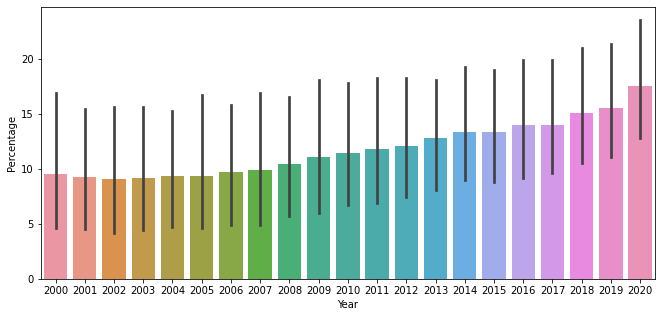

In [32]:
#How has renewable energy changed overall across the years?
plt.rcParams["figure.figsize"] = [11, 5]
sns.barplot(x = percent_renewables['Year'],
            y = percent_renewables['Percentage'], 
            data = percent_renewables)

From this table we can see that on average, each year has had an increase in overall percentage from use of renewable energy. Additionally, each country made not start off from the same place which could explain the huge differences in the min and max below, which could potentially skew our data.

In [33]:
#descriptive stats of each country throughout 2000-2020
table = percent_renewables.pivot('Year','Country','Percentage')
table.describe()

Country,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Spain,United Kingdom,United States
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.00000,21.000000,21.000000,21.000000
mean,5.233286,41.391667,27.252333,7.954667,8.209476,9.294952,6.710429,11.331048,5.936286,5.80000,12.830238,5.801238,5.870476
std,1.909023,2.329317,0.837283,2.776246,2.447302,5.147586,0.874927,4.746136,1.812935,1.04494,4.788020,5.202066,1.995089
min,3.437000,37.224000,25.599000,4.983000,5.075000,2.753000,5.296000,5.963000,4.396000,4.41600,6.060000,0.980000,3.195000
25%,3.782000,40.513000,26.847000,5.367000,6.299000,4.780000,6.131000,6.761000,4.525000,5.16200,8.533000,1.713000,3.944000
50%,4.051000,41.541000,27.273000,6.828000,7.331000,8.033000,6.803000,10.717000,5.191000,5.71400,14.669000,3.294000,5.504000
75%,6.174000,42.723000,27.651000,10.108000,9.915000,13.425000,7.033000,16.105000,7.347000,6.34200,16.599000,9.876000,6.983000
max,10.374000,46.054000,28.999000,13.429000,14.086000,19.575000,9.017000,18.539000,10.593000,9.17600,20.311000,18.255000,9.925000


<AxesSubplot:xlabel='Year', ylabel='Percentage'>

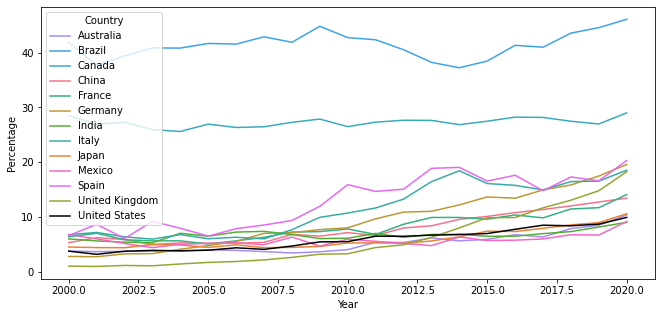

In [34]:
#How has each country's percentage of primary energy consumption replaced by renewable energy
#  changed across the years?
palatte = [sns.color_palette("husl", n_colors=10, as_cmap=True)(i)[:3] 
           for i in np.arange(0., 1., 1/(len(countries) - 1) )] + [[0., 0., 0.]] # set the last color to black
           
sns.lineplot(x = percent_renewables['Year'], 
            y = percent_renewables['Percentage'], 
            hue = percent_renewables['Country'], data = percent_renewables, palette=cmap)

In [35]:
#Which country has the highest change in terms of absolute percentage
(table.max() - table.min()).sort_values()

Country
Canada             3.400
India              3.721
Mexico             4.760
Japan              6.197
United States      6.730
Australia          6.937
China              8.446
Brazil             8.830
France             9.011
Italy             12.576
Spain             14.251
Germany           16.822
United Kingdom    17.275
dtype: float64

As we can see from the dataset, the overall general trend of energy consumption has largely been increasing from 2000 - 2020. Brazil has the highest consumption out of all the other countries followed by Canada, and Spain with a mix of other countries that fluctuate closely together. However, Brazil has the highest starting percentage, which makes sense that it ends up having the largest ending percentage. In terms of greatest overall change from year with the lowest percentage to highest percentage, we can see that United Kingdom has the greatest change with 17.2% and the U.S is around the middle with 6.7%. For a more detailed EDA, check the EDA checkpoint.

In [36]:
# for data merging
perc_renew_by_year = percent_renewables
perc_renew_by_year

,Country,Year,Percentage
0,Australia,2000,3.788
1,Australia,2001,3.686
2,Australia,2002,3.734
3,Australia,2003,3.798
4,Australia,2004,3.782
...,...,...,...
268,United States,2016,7.754
269,United States,2017,8.504
270,United States,2018,8.396
271,United States,2019,8.699


## Data merging & linear regression

From dataset 4 (see above), we can see that US was not doing very well in terms of the percentage of primary energy consumption replaced by renewable energy from 2000 to 2020 among the other top GDP countries. The United States has done a relatively poor job at replacing other energies with renewable energy sources. This is seen by the fact that in 2020 it had less than 10% of its overall energy consumption come from renewable energy sources, one of only 3 countries this was the case in within the countries we looked at, ranking them 11th amongst the 13 biggest economies in the world. We can see that this is in part due to their very large amount of energy consumption, as despite their low percentage, they still produce the second most overall renewable energy in 2020, and for a long time within the 2000's were actually the world leaders in producing many of the renewable resources. However, percentage is much more important, as a country with higher consumption should also be responsible for producing more energy. While the United States don't look that good when compared to other countries, they are still improving quite a bit, as they started off the 2000s closer to 5%. So what is the United States lacking? Why are we lagging so far behind compared to other countries?

In order to dive deeper to figure out why US was not doing well, we will try to analyze the effects that the number of patents, received public investment, donated public investment, and total renewable energy generated have on the percentage.

First, we will merge the 4 datasets into a single dataset and try to carry out multi-variable regression with an confidence level of 0.99 (i.e., an alpha value of 0.01).

In [37]:
# Review the 4 datasets:

# Dataset 1
renew_amount_by_year

,Country,Year,Wind,Solar,Other,Hydro,Overall
259,Australia,2000,0.134000,0.046750,0.889500,16.466500,17.536750
260,Australia,2001,0.287000,0.054150,0.797500,16.123500,17.262150
261,Australia,2002,0.533550,0.058300,1.266800,16.095000,17.953650
262,Australia,2003,0.704050,0.063200,1.691800,16.210550,18.669600
263,Australia,2004,0.795000,0.072950,2.815250,15.686650,19.369850
...,...,...,...,...,...,...,...
4738,United States,2016,229.285416,55.420202,82.722566,263.763663,631.191847
4739,United States,2017,256.871409,78.057576,82.800321,296.806446,714.535752
4740,United States,2018,275.421671,94.308081,81.893206,289.514596,741.137554
4741,United States,2019,298.871196,107.973737,76.820543,285.467664,769.133140


In [38]:
# Dataset 2

rec_donate_inv_by_year

,Year,Country,Received inv,Donated inv
0,2000,Brazil,126.496230,0.000000
1,2001,Brazil,5.289642,0.000000
2,2002,Brazil,45.306944,11.957554
3,2003,Brazil,7.525666,0.000000
4,2004,Brazil,1.140878,0.000000
...,...,...,...,...
268,2016,Japan,0.000000,889.406827
269,2017,Japan,0.000000,1264.698319
270,2018,Japan,0.000000,1659.034071
271,2019,Japan,0.000000,300.267748


In [39]:
# Dataset 3

num_patents_by_year

,Country,Year,Number of Patents
0,Australia,2000,1778
1,Australia,2001,2378
2,Australia,2002,1603
3,Australia,2003,3347
4,Australia,2004,877
...,...,...,...
262,United States,2016,29977
263,United States,2017,31003
264,United States,2018,30361
265,United States,2019,27348


In [40]:
# Dataset 4

perc_renew_by_year

,Country,Year,Percentage
0,Australia,2000,3.788
1,Australia,2001,3.686
2,Australia,2002,3.734
3,Australia,2003,3.798
4,Australia,2004,3.782
...,...,...,...
268,United States,2016,7.754
269,United States,2017,8.504
270,United States,2018,8.396
271,United States,2019,8.699


In [41]:
# merge datasets
df_list = [renew_amount_by_year, rec_donate_inv_by_year, num_patents_by_year]

data_df = perc_renew_by_year
for df2 in df_list:
    data_df = data_df.merge(df2, on=['Year', "Country"], how='outer')

data_df

,Country,Year,Percentage,Wind,Solar,Other,Hydro,Overall,Received inv,Donated inv,Number of Patents
0,Australia,2000,3.788,0.134000,0.046750,0.889500,16.466500,17.536750,0.0,0.376397,1778.0
1,Australia,2001,3.686,0.287000,0.054150,0.797500,16.123500,17.262150,0.0,0.000000,2378.0
2,Australia,2002,3.734,0.533550,0.058300,1.266800,16.095000,17.953650,0.0,0.720943,1603.0
3,Australia,2003,3.798,0.704050,0.063200,1.691800,16.210550,18.669600,0.0,0.000000,3347.0
4,Australia,2004,3.782,0.795000,0.072950,2.815250,15.686650,19.369850,0.0,0.000000,877.0
...,...,...,...,...,...,...,...,...,...,...,...
268,United States,2016,7.754,229.285416,55.420202,82.722566,263.763663,631.191847,0.0,970.488513,29977.0
269,United States,2017,8.504,256.871409,78.057576,82.800321,296.806446,714.535752,0.0,493.518086,31003.0
270,United States,2018,8.396,275.421671,94.308081,81.893206,289.514596,741.137554,0.0,587.734068,30361.0
271,United States,2019,8.699,298.871196,107.973737,76.820543,285.467664,769.133140,0.0,501.308395,27348.0


In [42]:
# should be expected that some countries might not have patents in some years
display(data_df.isna().any())
data_df[data_df["Number of Patents"].isna()]

Country              False
Year                 False
Percentage           False
Wind                 False
Solar                False
Other                False
Hydro                False
Overall              False
Received inv         False
Donated inv          False
Number of Patents     True
dtype: bool

,Country,Year,Percentage,Wind,Solar,Other,Hydro,Overall,Received inv,Donated inv,Number of Patents
142,India,2016,6.501,43.452830,11.555980,24.816846,128.381614,208.207270,2198.171641,0.0,NaN
144,India,2018,7.340,60.311160,36.331310,27.224090,139.753029,263.619589,1947.288210,0.0,NaN
145,India,2019,8.174,63.314230,46.267700,29.667094,162.015340,301.264364,865.647134,0.0,NaN
146,India,2020,9.017,60.427403,58.683467,32.098177,163.640106,314.849153,431.452839,0.0,NaN
167,Italy,2020,18.539,18.702530,25.953161,25.654734,46.696761,117.007186,100.192409,0.0,NaN
209,Mexico,2020,9.176,19.706818,11.873530,7.596100,26.836872,66.013320,376.623854,0.0,NaN


In [43]:
# For countries missing patent values for certain years, we fill it in with 0 since there were no patents
data_df = data_df.fillna(0.)

# rename columns for patsy formula (since spaces in col names create issues)
data_df.columns = ['Country', 'Year', 'Percentage', 'Wind', 'Solar', 'Other', 'Hydro',
                   'Total_renew_gen', 'Received_inv', 'Donated_inv', 'Num_of_patents']
data_df

,Country,Year,Percentage,Wind,Solar,Other,Hydro,Total_renew_gen,Received_inv,Donated_inv,Num_of_patents
0,Australia,2000,3.788,0.134000,0.046750,0.889500,16.466500,17.536750,0.0,0.376397,1778.0
1,Australia,2001,3.686,0.287000,0.054150,0.797500,16.123500,17.262150,0.0,0.000000,2378.0
2,Australia,2002,3.734,0.533550,0.058300,1.266800,16.095000,17.953650,0.0,0.720943,1603.0
3,Australia,2003,3.798,0.704050,0.063200,1.691800,16.210550,18.669600,0.0,0.000000,3347.0
4,Australia,2004,3.782,0.795000,0.072950,2.815250,15.686650,19.369850,0.0,0.000000,877.0
...,...,...,...,...,...,...,...,...,...,...,...
268,United States,2016,7.754,229.285416,55.420202,82.722566,263.763663,631.191847,0.0,970.488513,29977.0
269,United States,2017,8.504,256.871409,78.057576,82.800321,296.806446,714.535752,0.0,493.518086,31003.0
270,United States,2018,8.396,275.421671,94.308081,81.893206,289.514596,741.137554,0.0,587.734068,30361.0
271,United States,2019,8.699,298.871196,107.973737,76.820543,285.467664,769.133140,0.0,501.308395,27348.0


## Relationship of the renewable energy generated, received and donated public investment, and the number of patents to the <u>total change</u> of percentage of energy consumption replaced by renewable source

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


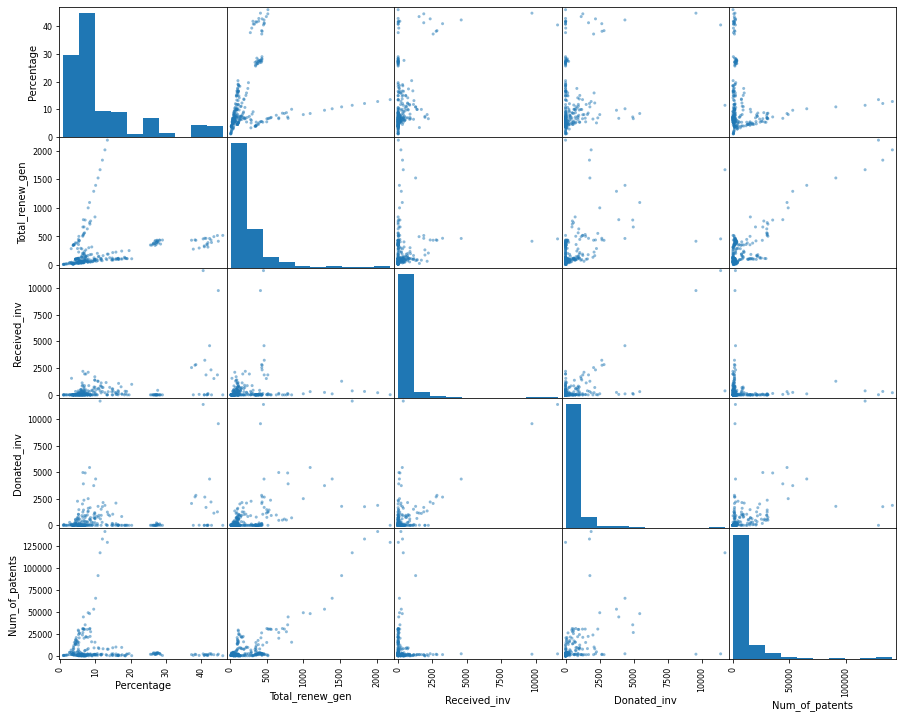

In [44]:
# visualize relationship between each var
pd.plotting.scatter_matrix(data_df[["Percentage", "Total_renew_gen", "Received_inv",
                                    "Donated_inv", "Num_of_patents"]], figsize=(15,12));

Our current dataset violates many assumptions that are needed for linear regression.

First, we do not have multivariate normality. We can see that our variables `Percentage`, `Total_renew_gen`, `Donated_inv`, and `Num_of_patents` are all skewed right.

We also have a multicollinearity problem in our dataset. We can see that many variables are highly correlated with each other, as seen by a strong linear relationship in the scatterplots.

We also have autocorrelation due to our data relying on time. For each observation, we have a country and its year. This means that observations in our dataset will depend on each other because a country's total amount of renewable energy generated in 2019, for example, will depend on its total amount of renewable energy generated in 2018.

We will fit a linear model to our current dataset to see how it appears. Note that this is not the final model we will use for analysis, as it is a highly invalid model due to our data failing to meet assumptions. This is for exploratory purposes.

In [45]:
outcome, predictors = patsy.dmatrices('Percentage ~ Total_renew_gen * Received_inv * Donated_inv * Num_of_patents', data_df) # from data, construct Y, and X
model = sm.OLS(outcome, predictors)
    
## fit the model
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Percentage   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     29.26
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           4.38e-47
Time:                        23:39:29   Log-Likelihood:                -898.23
No. Observations:                 273   AIC:                             1828.
Df Residuals:                     257   BIC:                             1886.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   6.3975      0.730      8.769      0.000       4.961       7.834
Total_renew_gen                                             0.0482      0.003     14.320      0.000       0.042       0.055
Received_inv                                               -0.0072      0.002     -3.783      0.000      -0.011      -0.003
Total_renew_gen:Received_inv                             3.551e-05   7.14e-06      4.972      0.000    2.14e-05    4.96e-05
Donated_inv                                                 0.0042      0.002      2.625      0.009       0.001       0.007
Total_renew_gen:Donated_inv                             -2.282e-05   3.82e-06     -5.981      0.000   -3.03e-05   -1.53e-05
Received_inv:Donated_inv                                 7.316e-07   1.09e-06      0.668      0.504   -1.42e-06    2.89e-06
Total_renew_gen:Received_inv:Donated_inv                -2.445e-09   3.43e-09     -0.713      0.476   -9.19e-09     4.3e-09
Num_of_patents                                             -0.0008   9.82e-05     -8.646      0.000      -0.001      -0.001
Total_renew_gen:Num_of_patents                           2.474e-08    5.2e-08      0.475      0.635   -7.77e-08    1.27e-07
Received_inv:Num_of_patents                              5.912e-07   8.43e-07      0.701      0.484   -1.07e-06    2.25e-06
Total_renew_gen:Received_inv:Num_of_patents             -3.952e-10      5e-10     -0.790      0.430   -1.38e-09     5.9e-10
Donated_inv:Num_of_patents                               2.629e-07   1.05e-07      2.502      0.013     5.6e-08     4.7e-07
Total_renew_gen:Donated_inv:Num_of_patents               9.452e-11   5.02e-11      1.884      0.061   -4.27e-12    1.93e-10
Received_inv:Donated_inv:Num_of_patents                  1.881e-10   4.82e-10      0.390      0.697   -7.61e-10    1.14e-09
Total_renew_gen:Received_inv:Donated_inv:Num_of_patents -3.026e-13   2.93e-13     -1.034      0.302   -8.79e-13    2.74e-13
==============================================================================
Omnibus:                       16.349   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.082
Skew:                           0.366   Prob(JB):                     1.32e-06
Kurtosis:                       4.358   Cond. No.                     1.03e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As expected, our condition number is extremely large due to multicollinearity problems in our dataset.

In order to avoid the issue of autocorrelation problem, we will extract a single statistic number from each time series, and then try to do multi-variable regression using this new dataset.

In [46]:
# extract a single statistic number for each time series
data_single_stat_df = data_df.groupby("Country").agg({
    "Total_renew_gen":"sum",
    "Received_inv": "sum",
    "Donated_inv": "sum",
    "Num_of_patents": "sum"
})

# Use the total change in percentage for each country as the dependent variable 
data_agg_df = (data_df[data_df["Year"] == 2020][["Country", "Percentage"]].set_index(keys="Country") - 
               data_df[data_df["Year"] == 2000][["Country", "Percentage"]].set_index(keys="Country"))
data_agg_df = data_agg_df.join(data_single_stat_df)
data_agg_df

,Percentage,Total_renew_gen,Received_inv,Donated_inv,Num_of_patents
Country,,,,,
Australia,6.586,629.519810,0.000000,40.514881,38311.0
Brazil,4.195,8570.383266,45121.437038,41829.158179,24415.0
Canada,0.525,8232.493973,426.283507,753.286318,49180.0
China,8.116,19703.165081,4426.841615,54022.713642,1005994.0
France,7.686,1723.116074,6450.685708,7632.239658,24807.0
Germany,16.773,2637.907405,3707.761978,15483.716353,135198.0
India,3.012,3455.729991,14419.964818,0.000000,2452.0
Italy,11.778,1676.410726,3396.834487,619.803216,5990.0
Japan,6.068,2678.590377,0.000000,12711.829610,394490.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


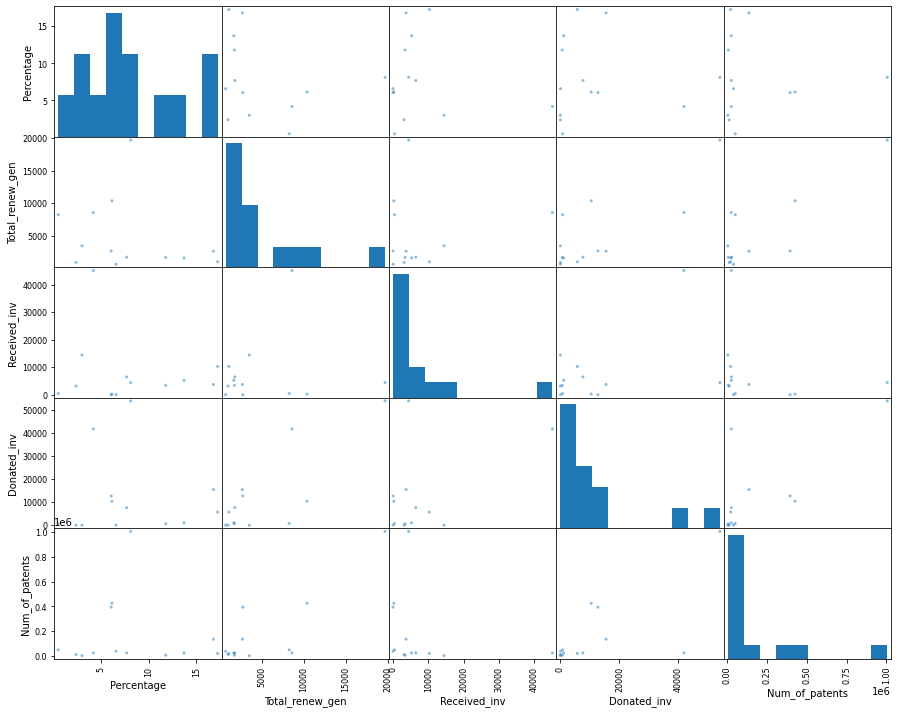

In [47]:
# visualize relationship between each var
pd.plotting.scatter_matrix(data_agg_df[["Percentage", "Total_renew_gen", "Received_inv",
                                    "Donated_inv", "Num_of_patents"]], figsize=(15,12));

The scatterplots here look less correlated, as the points are more randomly distributed. However, the four independent variables are still not normal, so to fix the violation of multivariate normality, we will try to apply log transformations to the independent variables.

In [48]:
# log transformation with offset 0.1
offset = 0.1
data_agg_df["Total_renew_gen"] = np.log10(data_agg_df["Total_renew_gen"] + offset)
data_agg_df["Received_inv"] = np.log10(data_agg_df["Received_inv"] + offset)
data_agg_df["Donated_inv"] = np.log10(data_agg_df["Donated_inv"] + offset)
data_agg_df["Num_of_patents"] = np.log10(data_agg_df["Num_of_patents"] + offset)

data_agg_df.columns = ["percent_changed", "log_total_renew_gen", "log_total_rec_inv", "log_total_donated_inv", "log_total_patent_num"]
data_agg_df

,percent_changed,log_total_renew_gen,log_total_rec_inv,log_total_donated_inv,log_total_patent_num
Country,,,,,
Australia,6.586,2.799078,-1.000000,1.608685,4.583325
Brazil,4.195,3.933005,4.654384,4.621480,4.387659
Canada,0.525,3.915537,2.629800,2.877018,4.691789
China,8.116,4.294538,3.646104,4.732577,6.002595
France,7.686,3.236340,3.809613,3.882658,4.394576
Germany,16.773,3.421276,3.569124,4.189878,5.130971
India,3.012,3.538552,4.158967,-1.000000,3.389538
Italy,11.778,3.224406,3.531087,2.792324,3.777434
Japan,6.068,3.427923,-1.000000,4.104211,5.596036


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


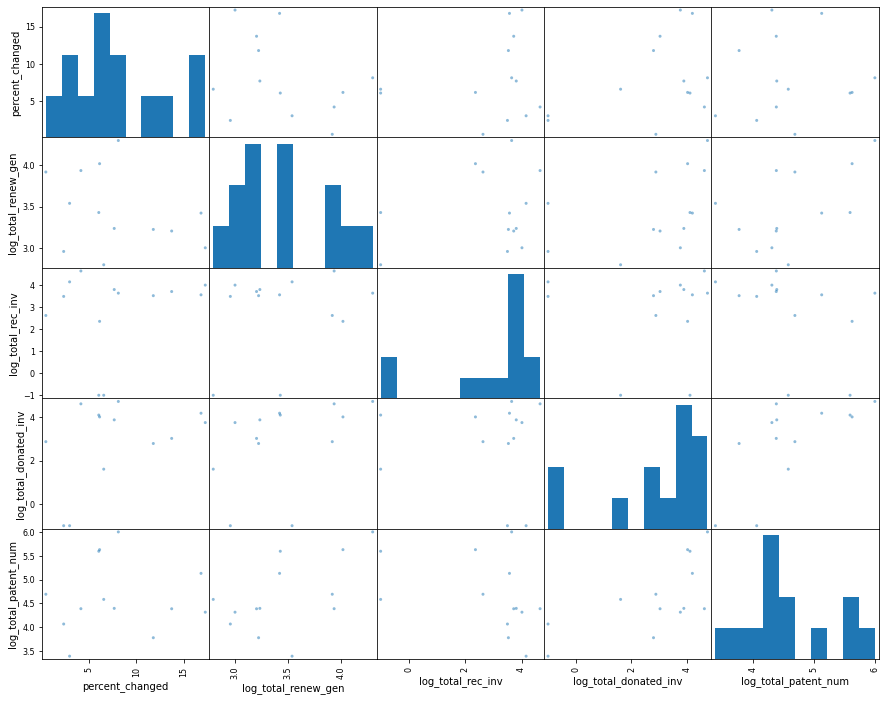

In [49]:
# visualize relationship between each var
pd.plotting.scatter_matrix(data_agg_df, figsize=(15,12));

The independent variables are far less right skewed now, and some variables are closer to a normal distribution. 

Looking at the scatterplots, no 2 independent variables are strongly correlated anymore, so we have fixed the issue of multicollinearity as well. This also matches up with our intuition, since by fixing the time series in our dataset, we no longer have autocorrelation relative to time.

In [50]:
outcome, predictors = patsy.dmatrices('percent_changed ~ log_total_renew_gen + log_total_rec_inv + log_total_donated_inv + log_total_patent_num', data_agg_df) # from data, construct Y, and X
model = sm.OLS(outcome, predictors)
    
## fit the model
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent_changed   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     4.499
Date:                Sun, 05 Jun 2022   Prob (F-statistic):             0.0338
Time:                        23:39:34   Log-Likelihood:                -32.091
No. Observations:                  13   AIC:                             74.18
Df Residuals:                       8   BIC:                             77.01
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.8501     10.108      2.261      0.054      -0.459      46.159
log_total_renew_gen     -11.2382      3.349     -3.355      0.010     -18.962      -3.514
log_total_rec_inv         1.7676      0.814      2.171      0.062      -0.110       3.645
log_total_donated_inv     1.5626      0.786      1.988      0.082      -0.250       3.375
log_total_patent_num      3.1047      2.693      1.153      0.282      -3.106       9.315
==============================================================================
Omnibus:                        1.449   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.085
Skew:                          -0.506   Prob(JB):                        0.581
Kurtosis:                       2.010   Cond. No.                         74.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our condition number is much lower now due to fixing the multicollinearity problem. 

Now by looking at the r-square number, we can tell that the linear model of independent variables can explain a moderate amount of the dependent variable's variation. Using our stated alpha value of 0.01, only `log_total_renew_gen` seems to be statistically significant.

**Result**: from this multi-variable linear regression, we can conclude that among top GDP countries from 2000 to 2020, the total change of the percentage of primary energy consumption replaced by renewable source is strongly correlated with total renewable energy generated, and weakly related to received and donated public investment and the number of patents.

It is reasonable and expected that there is some positive effect of the received and donated public investment and the number of patents on the improvement of the replacement of energy consumption with renewable energy. It makes intuitive sense that if a country spends more time and money donating public investment and creating patents for renewable energy, then we'd expect them to have greater interest and success in replacing energy consumption with renewable energy.

However, interestingly, by looking at the effect size of `log_total_renew_gen`, we can see that the **more** renewable energy a country generates, the **less** the country improved in their renewable energy utilization.

,percent_changed,log_total_renew_gen
Country,,
United Kingdom,17.219,3.003434
Germany,16.773,3.421276
Spain,13.700,3.205320
Italy,11.778,3.224406
China,8.116,4.294538
France,7.686,3.236340
Australia,6.586,2.799078
United States,6.153,4.015758
Japan,6.068,3.427923


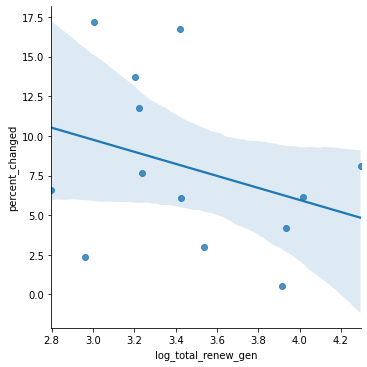

In [51]:
# check again percent_changed V.S. log_total_renew_gen
perc_by_renew_gen = data_agg_df[["percent_changed","log_total_renew_gen"]].sort_values(by="percent_changed", ascending=False)
display(perc_by_renew_gen)
sns.lmplot(data=perc_by_renew_gen, x="log_total_renew_gen", y="percent_changed")

So as the log of total renewable energy generated increases, the percent change decreases. This is a little counterintuitive. Let's check the original data.

In [52]:
# remind us what data_df looks like
data_df

,Country,Year,Percentage,Wind,Solar,Other,Hydro,Total_renew_gen,Received_inv,Donated_inv,Num_of_patents
0,Australia,2000,3.788,0.134000,0.046750,0.889500,16.466500,17.536750,0.0,0.376397,1778.0
1,Australia,2001,3.686,0.287000,0.054150,0.797500,16.123500,17.262150,0.0,0.000000,2378.0
2,Australia,2002,3.734,0.533550,0.058300,1.266800,16.095000,17.953650,0.0,0.720943,1603.0
3,Australia,2003,3.798,0.704050,0.063200,1.691800,16.210550,18.669600,0.0,0.000000,3347.0
4,Australia,2004,3.782,0.795000,0.072950,2.815250,15.686650,19.369850,0.0,0.000000,877.0
...,...,...,...,...,...,...,...,...,...,...,...
268,United States,2016,7.754,229.285416,55.420202,82.722566,263.763663,631.191847,0.0,970.488513,29977.0
269,United States,2017,8.504,256.871409,78.057576,82.800321,296.806446,714.535752,0.0,493.518086,31003.0
270,United States,2018,8.396,275.421671,94.308081,81.893206,289.514596,741.137554,0.0,587.734068,30361.0
271,United States,2019,8.699,298.871196,107.973737,76.820543,285.467664,769.133140,0.0,501.308395,27348.0


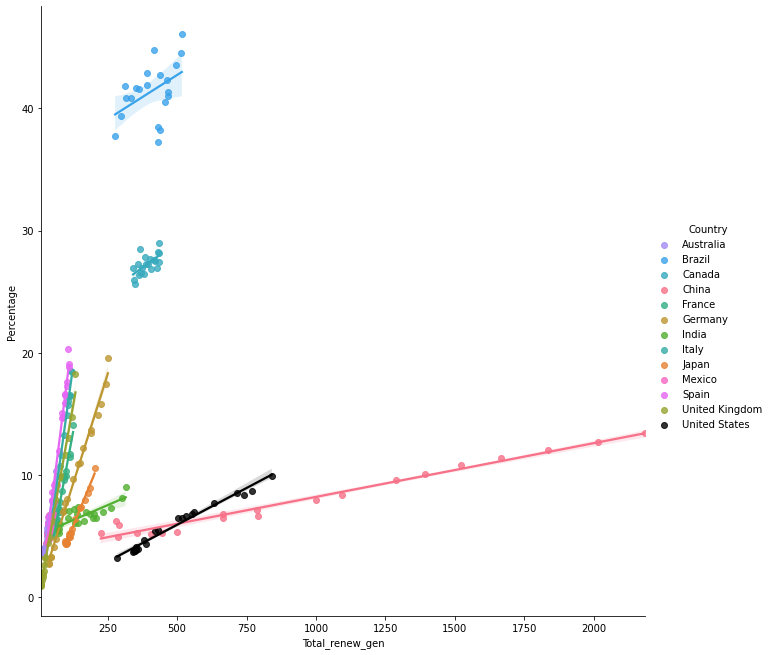

In [53]:
# let's check the original data (before aggregating and log transformation)
sns.lmplot(data=data_df, x="Total_renew_gen", y="Percentage", hue="Country", height=9, palette=cmap)

Clearly, this did not happen in the original data. With more testing, we found out that once we started using the change of the percentage, the correlation between total renewable energy generated and the percent change became negative. Changing it to the average percentage over the 21 years makes the correlation positive.

,percent_changed,log_total_renew_gen,ave_percent
Country,,,
United Kingdom,17.219,3.003434,5.801238
Germany,16.773,3.421276,9.294952
Spain,13.700,3.205320,12.830238
Italy,11.778,3.224406,11.331048
China,8.116,4.294538,7.954667
France,7.686,3.236340,8.209476
Australia,6.586,2.799078,5.233286
United States,6.153,4.015758,5.870476
Japan,6.068,3.427923,5.936286


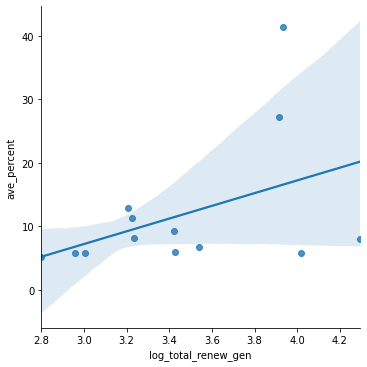

In [54]:
# plotting the average percent from 2000 to 2020 instead of the total change
perc_by_renew_gen_unlog = perc_by_renew_gen.copy()
# perc_by_renew_gen_unlog["total_renew_gen"] = np.power(10, perc_by_renew_gen_unlog["log_total_renew_gen"]) - offset
perc_by_renew_gen_unlog["ave_percent"] = data_df.groupby("Country")["Percentage"].mean()
display(perc_by_renew_gen_unlog)
sns.lmplot(data=perc_by_renew_gen_unlog, x="log_total_renew_gen", y="ave_percent")


Here, looking at `log_total_renew_gen` versus `ave_percent`, the correlation is positive. Whereas before, when looking at `log_total_renew_gen` versus `percent_change`, the correlation was negative.


**Possible explanation of why the corelation is negative**: if a country starts off with a low amount of renewable energy generated, the it is easier for it to increase the percentage; however, for a more developed countries, the percentage is barred by both the technology as well as the natural resource. In other words, raising the percentage from 30% to 35% is expected to be much harder than from 5% to 10%. This means that the if a country have better economy/GDP/renewable energy development, it is more likely that this country will produce more renewable energy compared to other countries, but improved fewer in terms of the percentage of the energy consumption replaced by the renewable energy. Therefore, using the percentage changed as the dependent variable will somehow underrate the actual effort and progress of countries on renewable energy utilization.

## Relationship of the renewable energy generated, received and donated public investment, and the number of patents to the <u>average</u> percentage of energy consumption replaced by renewable source

Let's try to do a similar analysis, but for this time, we use the average percentage of primary energy consumption replaced by renewable source as the dependent variable.

In [55]:
# extract a single statistic number for each time series
data_ave_agg_df = data_df.groupby("Country").agg({
    "Percentage": "mean",
    "Total_renew_gen":"mean",
    "Received_inv": "mean",
    "Donated_inv": "mean",
    "Num_of_patents": "mean"
})
data_ave_agg_df

# log transformation
offset = 0.1
data_ave_agg_df["log_ave_percent"] = np.log10(data_ave_agg_df["Percentage"] + offset)
data_ave_agg_df["Total_renew_gen"] = np.log10(data_ave_agg_df["Total_renew_gen"] + offset)
data_ave_agg_df["Received_inv"] = np.log10(data_ave_agg_df["Received_inv"] + offset)
data_ave_agg_df["Donated_inv"] = np.log10(data_ave_agg_df["Donated_inv"] + offset)
data_ave_agg_df["Num_of_patents"] = np.log10(data_ave_agg_df["Num_of_patents"] + offset)

data_ave_agg_df = data_ave_agg_df.sort_values(by="Percentage", ascending=False)
data_ave_agg_df = data_ave_agg_df[['Percentage', 'log_ave_percent', 'Total_renew_gen', 
                                   'Received_inv', 'Donated_inv', 'Num_of_patents']]
data_ave_agg_df.columns = ["ave_percent", "log_ave_percent", "log_ave_renew_gen", "log_ave_rec_inv", 
                           "log_ave_donated_inv", "log_ave_patent_num"]
data_ave_agg_df

,ave_percent,log_ave_percent,log_ave_renew_gen,log_ave_rec_inv,log_ave_donated_inv,log_ave_patent_num
Country,,,,,,
Brazil,41.391667,1.617961,2.610887,3.332184,3.299282,3.065475
Canada,27.252333,1.436994,2.593423,1.309613,1.555950,3.369588
Spain,12.830238,1.111607,1.883641,2.397208,1.705993,3.064157
Italy,11.331048,1.058086,1.902705,2.209123,1.471504,2.455360
Germany,9.294952,0.972895,2.099386,2.247138,2.867715,3.808758
France,8.209476,0.919574,1.914624,2.487528,2.560552,3.072392
China,7.954667,0.906048,2.972363,2.324081,3.410374,4.680377
India,6.710429,0.833174,2.216584,2.836808,-1.000000,2.067673
Japan,5.936286,0.780770,2.106027,-1.000000,2.782061,4.273819


We also applied a log transformation to `ave_percent` this time so we can get a more normal distribution within variables.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


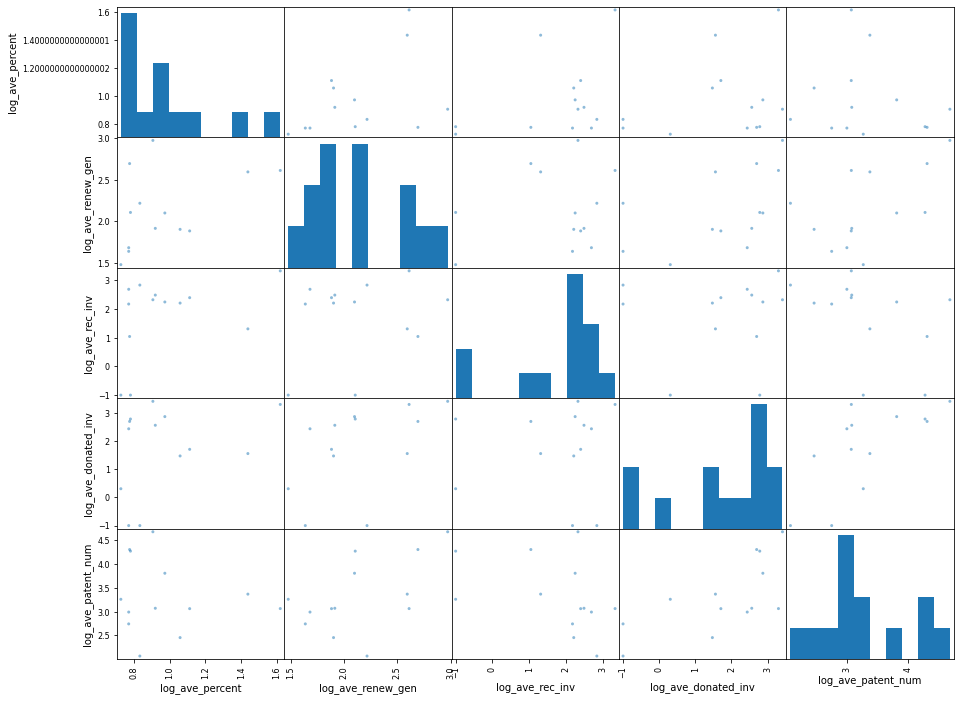

In [56]:
# visualize relationship between each var
pd.plotting.scatter_matrix(data_ave_agg_df[
    ["log_ave_percent", "log_ave_renew_gen", "log_ave_rec_inv", 
     "log_ave_donated_inv", "log_ave_patent_num"]
], figsize=(15,12));

In [57]:
outcome, predictors = patsy.dmatrices('log_ave_percent ~ log_ave_renew_gen + log_ave_rec_inv + log_ave_donated_inv + log_ave_patent_num', data_ave_agg_df) # from data, construct Y, and X
model = sm.OLS(outcome, predictors)
    
## fit the model
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_ave_percent   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     2.748
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.104
Time:                        23:39:40   Log-Likelihood:                 4.5133
No. Observations:                  13   AIC:                            0.9735
Df Residuals:                       8   BIC:                             3.798
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2363      0.473      2.614      0.031       0.146       2.327
log_ave_renew_gen       0.4378      0.198      2.215      0.058      -0.018       0.894
log_ave_rec_inv        -0.0522      0.070     -0.747      0.477      -0.213       0.109
log_ave_donated_inv     0.1292      0.067      1.922      0.091      -0.026       0.284
log_ave_patent_num     -0.4017      0.175     -2.289      0.051      -0.806       0.003
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                0.960
Skew:                           0.147   Prob(JB):                        0.619
Kurtosis:                       1.702   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis:

Using our alpha value of 0.01, none of the variables result in a coefficient that is statistially significant, but are still worth investigating.

`log_ave_renew_gen` is positively correlated with `log_ave_percent`, which makes sense since intuitively, a country that increases their renewable energy generation should create an increase in the country's average percentage of energy coming from renewable resources since there is more energy being generated from renewable resources.

`log_ave_donated_inv` is positively correlated with `log_ave_percent`, which make sense since the donor is usually stronger.

`log_ave_rec_inv` is negatively correlated with `log_ave_percent`, which make sense since the receiver is usually weaker.

`log_ave_patent_num` is **negatively correlated** with `log_ave_percent`, which is an interesting find. We'd expect a positive correlation since a country who files more patents should intuitively have more percentage of energy coming from renewable resources, as filing many patents would imply that a country has great interest in renewable energy.

,log_ave_percent,log_ave_patent_num
Country,,
Brazil,1.617961,3.065475
Canada,1.436994,3.369588
Spain,1.111607,3.064157
Italy,1.058086,2.455360
Germany,0.972895,3.808758
France,0.919574,3.072392
China,0.906048,4.680377
India,0.833174,2.067673
Japan,0.780770,4.273819


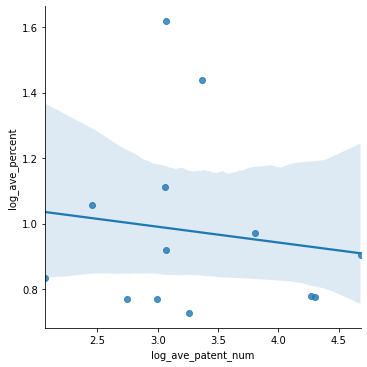

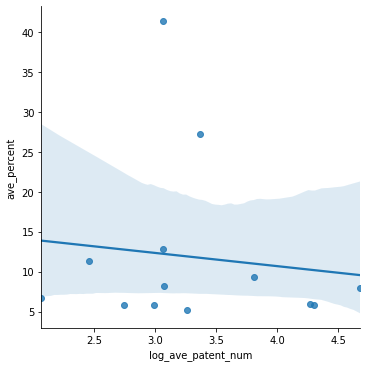

In [58]:
# Let's check again percent_changed V.S. log_total_renew_gen
display(data_ave_agg_df[["log_ave_percent","log_ave_patent_num"]])
sns.lmplot(data=data_ave_agg_df, x="log_ave_patent_num", y="log_ave_percent")

sns.lmplot(data=data_ave_agg_df, x="log_ave_patent_num", y="ave_percent")


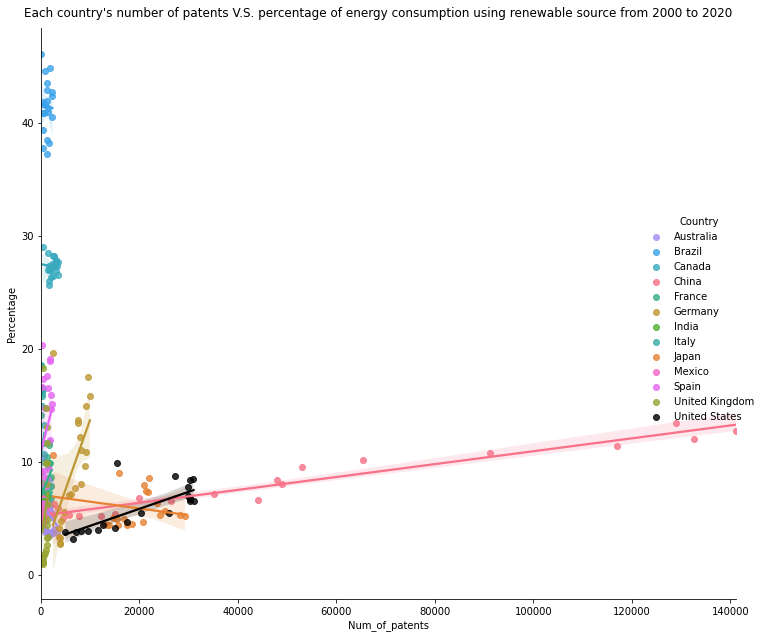

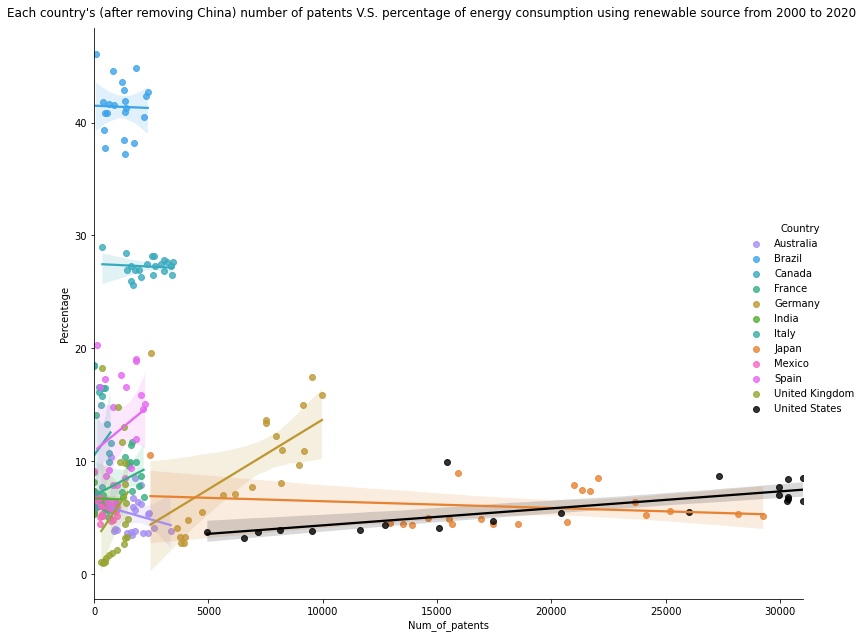

In [68]:
# let's check the original data (before aggregating and log transformation)
sns.lmplot(data=data_df, x="Num_of_patents", y="Percentage", hue="Country", height=9, palette=cmap)
plt.suptitle("Each country's number of patents V.S. percentage of energy consumption using renewable source from 2000 to 2020")
plt.tight_layout()

# excluding China
sns.lmplot(data=data_df[data_df["Country"] != "China"], x="Num_of_patents", y="Percentage", hue="Country", height=9, palette=cmap)
plt.suptitle("Each country's (after removing China) number of patents V.S. percentage of energy consumption using renewable source from 2000 to 2020")
plt.tight_layout()

It seems like that except for a few countries such as China, the average number of patents related to the renewable energy was not really positively correlated with the average percent of energy consumption using renewable energy. As the number of patents increases, the average percent can both increase and decrease.

**Possible explanation**: it might be due to our small sample size, or the time spam is not long enough. The patents invented are not directly related to the percentage of energy consumption using renewable energy, but they may have some beneficial effects in a few years or decades later. Besides, each patent does not necessarily have equal importance. It is more likely that patents from leading countries like China play a bigger role in the renewable energy developement over the world.

# Ethics & Privacy

The EIA provides free and open data to the public, allowing us access to use the data freely. The dataset uses differential privacy as the data is aggregated. For example, one dataset provides information only about the energy generation and use from the countries overall and does not say anything about any particular state or city. Due to the data being more concrete, it is unlikely to have any major biases.
At the beginning, we collected data by continent, but we found that the data were not representative, because the data of each continent included many countries with underdeveloped economies and technology. The use of renewable energy needs economic and technological support, so we decided to collect only a few major economies as representatives. 


# Conclusion & Discussion

CONCLUSION:

Overall, the United States has done a relatively poor job at replacing other energies with renewable energy sources. This is seen by the fact that in 2020 it had less than 10% of its overall energy consumption come from renewable energy sources, one of only 3 countries this was the case in within the countries we looked at, ranking them 11th amongst the 13 biggest economies in the world. We can see that this is in part due to their very large amount of energy consumption, as despite their low percentage, they still produce the second most overall renewable energy in 2020, and for a long time within the 2000's were actually the world leaders in producing many of the renewable resources. However, percentage is much more important, as a country with higher consumption should also be responsible for producing more energy. While the United States don't look that good when compared to other countries, they are still improving quite a bit, as they started off the 2000s closer to 5%. So what is the United States lacking? Why are we lagging so far behind compared to other countries?

Firstly, we should look in comparison to China, who similarly to the United States has an extremely large economy and large energy consumption needs. Although China started at a slightly higher point when entering the 2000s, they have continually upped their percentage of renewable energy and this is likely due to the number of patents that come out of China. Part of this may have to do with the much higher patent number. This makes sense to us intuitively, since this would just allow better and more efficient ways for a country to produce renewable energy. And you can see that China vastly outstrips the United States in recent years in both patents and energy produced. Despite this, our patent data would suggest otherwise, however if we consider that patents from world leaders like China and the United States to be more important, this may be a possible explanation as to why China is doing so well.

Compared to Brazil who are the world leaders in percent renewable energy compared to total consumption, the United States does not spend nearly as much money. The United States are 5th in money spent, but very far away from Brazil who are the world leaders in this aspect. And this does not even take into account the comparative amount of resources each country has. So it makes sense that the United States are lagging behind many of the other countries who have more patents and more money spent.

We should also note that based on the correlational study, the countries with a much larger economy/renewable resource percentage often don't change much, so the United States with a large amount of total renewable energy entering 2000, would have a much harder time developing more renewable energy resources (perhaps due to a lack of natural resources or barriers in science).

LIMITATIONS:

Our linear regression model has some issues, we have a relatively small sample size which always is an issue (only 13 countries). On top of this, it doesn't account for confounding variables (since this is only correlational data). We weren't able to capture the difference in natural resources between these countries. It is highly likely that the reason that Brazil leads the world's biggest economies in renewable resources is at least in part due to their natural resources, having access to the Amazon River and other ways to generate more natural energies. We also cannot conclude that other measures like amount donated vs. average percent amount of energy produced is causational, simply correlational, and we can think of other confounding variables, like more those who are more interested would also produce much more energy. The countries that have more of a focus on renewable resources are more likely to spend money to donate, which in turn probably means they are more likely to have technology and resources to harvest their own renewable resources.

On top of this, this comparison isn't entirely fair to the United States, because of our larger physical size and larger economy, it is much harder to compare to countries with fractions of our energy consumption. This is why a country like China is a good comparison point, since they mirror us in a lot of ways by size and economy. When comparing the United States to China in renewable energy, we also aren't considering the other aspect of energy generation, since while China has the United States beat in most categories of renewable energy, they also are the world leaders in coal consumption, which is very damaging to the environment -- somewhat counterproductive to having a high renewable energy percentage.

So overall, while there is no country that is perfect, we can all strive to be better, and if the United States wants to match other countries in renewable resources, they will have to spend much more money.

# Team Contributions

- Keri Chen: In charge of Dataset 4 (EDA & descriptive statistics) and Video. Helped with research question & hypothesis. Final walkthrough of project. 
- Michael Zhang: In charge of Dataset 1 (EDA & descriptive statistics) and Conclusion. Helped with research question & hypothesis. 
- TianLin Zhao: Background Information
- Christine Deng: In charge of Dataset 3 (EDA & descriptive statistics) and Data Analysis. Helped with research question & hypothesis. 
- Qiyu Chen: In charge of Dataset 2 (EDA & descriptive statistics) and Data Analysis. Helped with research question & hypothesis. 